In [ ]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose, LeakyReLU, GaussianNoise
from keras import models
from keras import layers
import tensorflow as tf
from keras import backend as K
from keras.datasets import mnist
import keras

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [ ]:
from sklearn.model_selection import train_test_split

import zipfile
import os

from skimage.transform import resize
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

#dataframe = pd.read_csv('/content/drive/MyDrive/galaxy_zoo/training_solutions_rev2.csv')

#dataframe_train, dataframe_test = train_test_split(dataframe, test_size=.2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_file = '/content/drive/MyDrive/galaxy_zoo/training2.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

In [ ]:
Main_JPG_Data = Path("/content/training2")

In [ ]:
JPG_Path = list(Main_JPG_Data.glob(r"*.jpg"))
len(JPG_Path)

30202

In [ ]:
Another_JPG_Path = JPG_Path[24161:]
JPG_Path = JPG_Path[0:6041]

In [ ]:
len(Another_JPG_Path)

6041

In [ ]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)

In [ ]:
print(JPG_Path_Series.head(-1))

0       /content/training2/881129.jpg
1       /content/training2/855978.jpg
2       /content/training2/904750.jpg
3       /content/training2/842848.jpg
4       /content/training2/785729.jpg
                    ...              
6035    /content/training2/948467.jpg
6036    /content/training2/804065.jpg
6037    /content/training2/865006.jpg
6038    /content/training2/960724.jpg
6039    /content/training2/602085.jpg
Name: JPG, Length: 6040, dtype: object


In [ ]:
Another_JPG_Path_Series = pd.Series(Another_JPG_Path,name="JPG").astype(str)

In [ ]:
print(Another_JPG_Path_Series.head(-1))

0       /content/training2/957949.jpg
1       /content/training2/842517.jpg
2       /content/training2/844601.jpg
3       /content/training2/609819.jpg
4       /content/training2/900891.jpg
                    ...              
6035    /content/training2/813895.jpg
6036    /content/training2/611781.jpg
6037    /content/training2/841139.jpg
6038    /content/training2/851273.jpg
6039    /content/training2/972824.jpg
Name: JPG, Length: 6040, dtype: object


In [ ]:
print(JPG_Path_Series[0])

/content/training2/976255.jpg


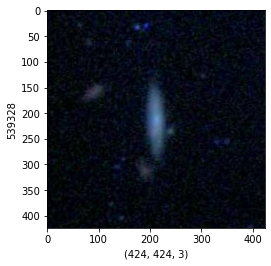

In [ ]:
Example_IMG = cv2.imread(JPG_Path_Series[0])
plt.xlabel(Example_IMG.shape)
plt.ylabel(Example_IMG.size)
plt.imshow(Example_IMG)

In [ ]:
#JPG_Path = list(Main_JPG_Data.glob(r"*.jpg"))

In [ ]:
#Another_JPG_Path = JPG_Path[60000:120000]
#JPG_Path = JPG_Path[0:60000]

In [ ]:
Transformated_IMG = []

for X_Img in JPG_Path_Series:
    IMG = cv2.imread(X_Img)
    #IMG = cv2.imread(X_Img,0)
    IMG = IMG[120:300,110:310]
    R_IMG = cv2.resize(IMG,(64,64))
    Transformated_IMG.append(R_IMG)

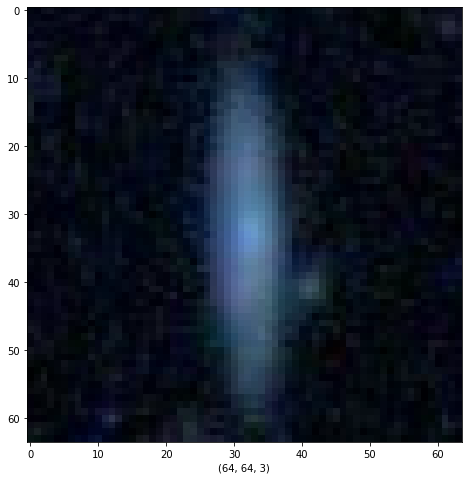

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.xlabel(Transformated_IMG[0].shape)
plt.imshow(Transformated_IMG[0])

In [ ]:
Transformated_Another_IMG = []

for X_Img in Another_JPG_Path_Series:
    IMG = cv2.imread(X_Img)
    #IMG = cv2.imread(X_Img,0)
    IMG = IMG[120:300,110:310]
    R_IMG = cv2.resize(IMG,(64,64))
    Transformated_Another_IMG.append(R_IMG)

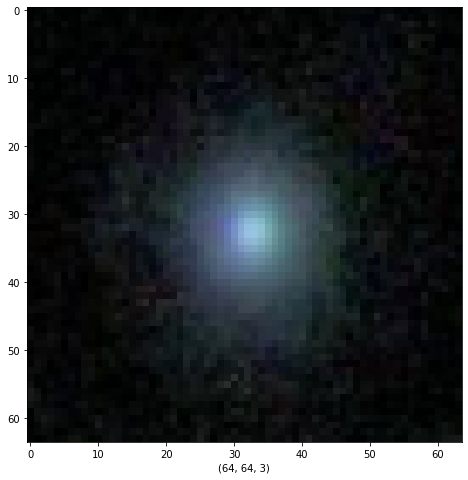

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.xlabel(Transformated_Another_IMG[0].shape)
plt.imshow(Transformated_Another_IMG[0])

In [ ]:
Transformated_IMG_Scaled = []

for T_Img in Transformated_IMG:
    T_Img = T_Img / 255
    Transformated_IMG_Scaled.append(T_Img)

Text(0.5, 0, '(64, 64, 3)')

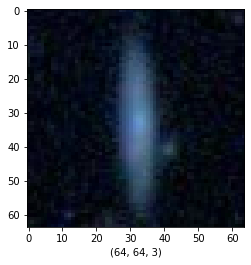

In [ ]:
plt.imshow(Transformated_IMG_Scaled[0])
plt.xlabel(Transformated_IMG_Scaled[0].shape)

In [ ]:
Another_Transformated_IMG_Scaled = []

for T_Img in Transformated_Another_IMG:
    T_Img = T_Img / 255
    Another_Transformated_IMG_Scaled.append(T_Img)

Text(0.5, 0, '(64, 64, 3)')

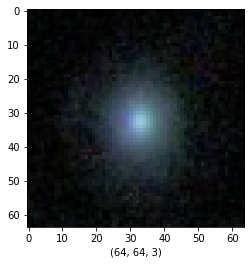

In [ ]:
plt.imshow(Another_Transformated_IMG_Scaled[0])
plt.xlabel(Another_Transformated_IMG_Scaled[0].shape)

In [ ]:
N_Transformated_IMG_Scaled = np.array(Transformated_IMG_Scaled)
N_Another_Transformated_IMG_Scaled = np.array(Another_Transformated_IMG_Scaled)

In [ ]:
print(N_Transformated_IMG_Scaled.shape)

(6041, 64, 64, 3)


In [ ]:
print(N_Another_Transformated_IMG_Scaled.shape)

(6041, 64, 64, 3)


In [ ]:
X_Train = N_Transformated_IMG_Scaled
X_Test = N_Another_Transformated_IMG_Scaled

In [ ]:
Array_IMG = np.asarray(Transformated_IMG)
print(Array_IMG.shape)

(6041, 64, 64, 3)


In [ ]:
Array_IMG = Array_IMG.reshape(-1,64,64,1)
print(Array_IMG.shape)

(18123, 64, 64, 1)


In [ ]:
Another_Array_IMG = np.asarray(Transformated_Another_IMG)
print(Another_Array_IMG.shape)

(6041, 64, 64, 3)


In [ ]:
Another_Array_IMG = Another_Array_IMG.reshape(-1,64,64,1)
print(Another_Array_IMG.shape)

(18123, 64, 64, 1)


In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[64,64]))
encoder.add(Dense(500,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(300,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [ ]:
print(encoder.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 500)               2048500   
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dense_2 (Dense)             (None, 300)               120300    
                                                                 
 dense_3 (Dense)             (None, 200)               60200     
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 50)                5

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(300,activation="relu"))
decoder.add(Dense(400,activation="relu"))
decoder.add(Dense(500,activation="relu"))
decoder.add(Dense(4096,activation="sigmoid"))
decoder.add(Reshape([64,64]))

In [ ]:
print(decoder.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                1300      
                                                                 
 dense_8 (Dense)             (None, 100)               5100      
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 dense_10 (Dense)            (None, 300)               60300     
                                                                 
 dense_11 (Dense)            (None, 400)               120400    
                                                                 
 dense_12 (Dense)            (None, 500)               200500    
                                                                 
 dense_13 (Dense)            (None, 4096)             

Тест

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[64,64]))
encoder.add(Dense(500,activation="relu"))
encoder.add(BatchNormalization())
encoder.add(LeakyReLU())
encoder.add(Dense(400,activation="relu"))
encoder.add(BatchNormalization())
encoder.add(LeakyReLU())
encoder.add(Dense(300,activation="relu"))
encoder.add(BatchNormalization())
encoder.add(LeakyReLU())
encoder.add(Dense(200,activation="relu"))
encoder.add(BatchNormalization())
encoder.add(LeakyReLU())
encoder.add(Dense(100,activation="relu"))
encoder.add(BatchNormalization())
decoder.add(LeakyReLU())
encoder.add(Dense(50,activation="relu"))
encoder.add(BatchNormalization())
encoder.add(LeakyReLU())
encoder.add(Dense(25,activation='linear', activity_regularizer=keras.regularizers.L1(0.0001)))
print(encoder.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_35 (Dense)            (None, 500)               2048500   
                                                                 
 batch_normalization_14 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 500)               0         
                                                                 
 dense_36 (Dense)            (None, 400)               200400    
                                                                 
 batch_normalization_15 (Bat  (None, 400)              1600      
 chNormalization)                                     

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation="relu"))
decoder.add(BatchNormalization())
decoder.add(LeakyReLU())
decoder.add(Dense(100,activation="relu"))
decoder.add(BatchNormalization())
decoder.add(LeakyReLU())
decoder.add(Dense(200,activation="relu"))
decoder.add(BatchNormalization())
decoder.add(LeakyReLU())
decoder.add(Dense(300,activation="relu"))
decoder.add(BatchNormalization())
decoder.add(LeakyReLU())
decoder.add(Dense(400,activation="relu"))
decoder.add(BatchNormalization())
decoder.add(LeakyReLU())
decoder.add(Dense(500,activation="relu"))
decoder.add(BatchNormalization())
decoder.add(LeakyReLU())
decoder.add(Dense(4096,activation="sigmoid"))
decoder.add(Reshape([64,64]))
print(decoder.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 50)                1300      
                                                                 
 batch_normalization_20 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 50)                0         
                                                                 
 dense_43 (Dense)            (None, 100)               5100      
                                                                 
 batch_normalization_21 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 100)              

In [ ]:
# convolutional autoencoder
AutoEncoder2 = Sequential()
# input layer
AutoEncoder2.add(Flatten(input_shape=[64,64,3]))
# encoder
AutoEncoder2.add(Dense(500,activation="relu"))
AutoEncoder2.add(BatchNormalization())
AutoEncoder2.add(LeakyReLU())
# bottleneck
AutoEncoder2.add(Dense(25,activation='linear', activity_regularizer=keras.regularizers.L1(0.0001)))
# decoder
AutoEncoder2.add(Dense(500,input_shape=[25],activation="relu"))
AutoEncoder2.add(BatchNormalization())
AutoEncoder2.add(LeakyReLU())
# output layer
AutoEncoder2.add(Dense(12288,activation="sigmoid"))
AutoEncoder2.add(Reshape([64,64,3]))

print(AutoEncoder2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_4 (Dense)             (None, 500)               6144500   
                                                                 
 batch_normalization_2 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 25)                12525     
                                                                 
 dense_6 (Dense)             (None, 500)               13000     
                                                      

In [ ]:
AutoEncoder = Sequential([encoder,decoder])
print(AutoEncoder.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 25)                2462025   
                                                                 
 sequential_8 (Sequential)   (None, 64, 64)            2466096   
                                                                 
Total params: 4,928,121
Trainable params: 4,921,921
Non-trainable params: 6,200
_________________________________________________________________
None


In [ ]:
AutoEncoder2.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
AutoEncoder2.fit(X_Train,X_Train,validation_data=(X_Test,X_Test),epochs=30)

Epoch 1/30
189/189 [==============================] - 47s 236ms/step - loss: 0.2913 - accuracy: 0.5261 - val_loss: 0.3355 - val_accuracy: 0.5323
Epoch 2/30
189/189 [==============================] - 46s 242ms/step - loss: 0.2622 - accuracy: 0.5690 - val_loss: 0.2684 - val_accuracy: 0.5884
Epoch 3/30
189/189 [==============================] - 46s 245ms/step - loss: 0.2587 - accuracy: 0.5841 - val_loss: 0.2645 - val_accuracy: 0.5942
Epoch 4/30
189/189 [==============================] - 44s 232ms/step - loss: 0.2571 - accuracy: 0.5929 - val_loss: 0.2663 - val_accuracy: 0.6170
Epoch 5/30
189/189 [==============================] - 44s 232ms/step - loss: 0.2561 - accuracy: 0.6007 - val_loss: 0.2585 - val_accuracy: 0.5735
Epoch 6/30
189/189 [==============================] - 44s 233ms/step - loss: 0.2553 - accuracy: 0.6056 - val_loss: 0.2591 - val_accuracy: 0.5903
Epoch 7/30
189/189 [==============================] - 49s 257ms/step - loss: 0.2547 - accuracy: 0.6105 - val_loss: 0.2579 - val_ac

--------

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(64, 64, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(X_Train,X_Train,validation_data=(X_Test,X_Test),epochs=30,batch_size=256)

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

-----------------

In [ ]:
PRE_Img = AutoEncoder2.predict(X_Test)

NORMAL


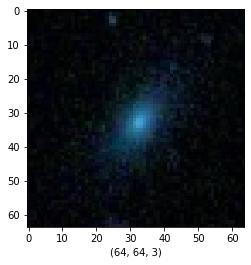

Auto Encoder


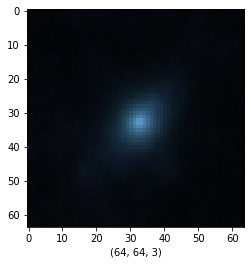

In [ ]:
prediction_img = 0
print("NORMAL")
plt.imshow(X_Test[prediction_img])
plt.xlabel(X_Test[prediction_img].shape)
plt.show()
print("Auto Encoder")
plt.xlabel(PRE_Img[prediction_img].shape)
plt.imshow(PRE_Img[prediction_img])

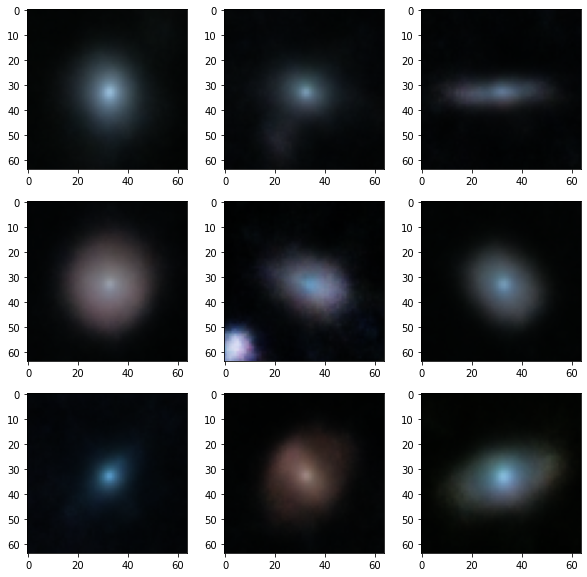

In [ ]:
figure,axis = plt.subplots(nrows=3,ncols=3,figsize=(10,10))

for P_Image,ax in enumerate(axis.flat):
    ax.imshow(PRE_Img[P_Image])

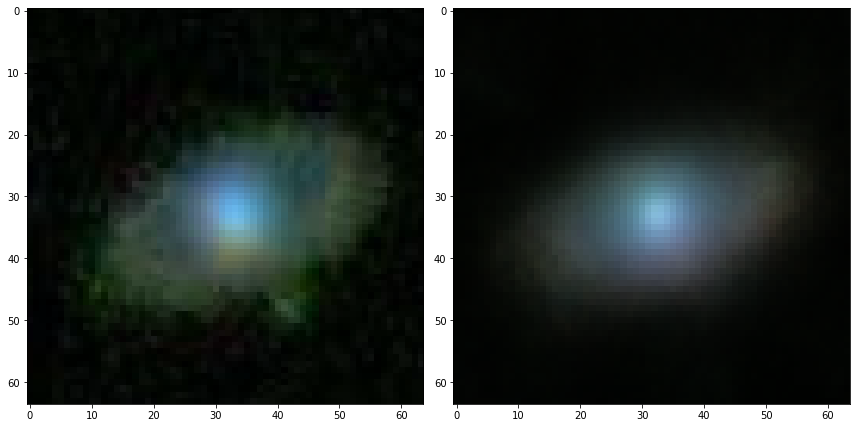

In [ ]:
normal_IMG = X_Test[8]
After_AutoEncoder = PRE_Img[8]

IMGs_List_R = [normal_IMG,After_AutoEncoder]

figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

for i, ax in enumerate(axis.flat):
    ax.imshow(IMGs_List_R[i])
plt.tight_layout()
plt.show()


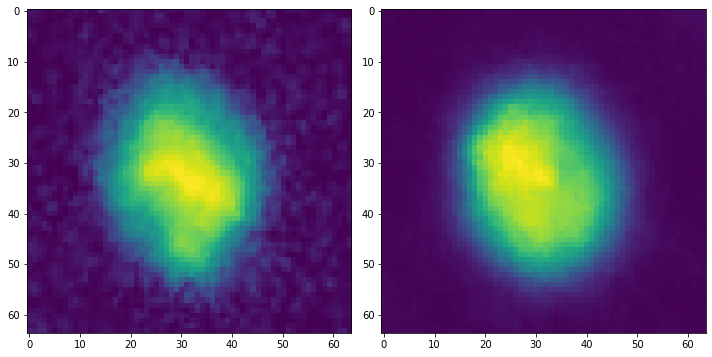

In [ ]:
PRE_Img = AutoEncoder.predict(X_Test[:10])

normal_IMG = X_Test[1]
After_AutoEncoder = PRE_Img[1]

IMGs_List_R = [normal_IMG,After_AutoEncoder]

figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(10,10))

for i, ax in enumerate(axis.flat):
    ax.imshow(IMGs_List_R[i])
plt.tight_layout()
plt.show()

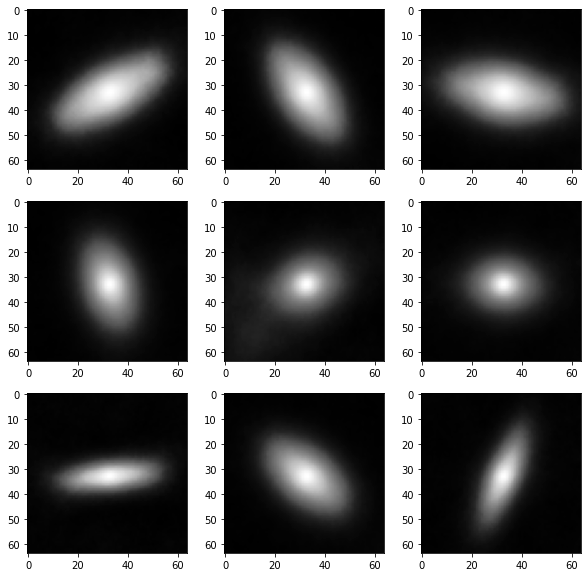

In [ ]:
figure,axis = plt.subplots(nrows=3,ncols=3,figsize=(10,10))

for P_Image,ax in enumerate(axis.flat):
    #ax.imshow(PRE_Img[P_Image],cmap="Greys_r")
    #ax.savefig()

In [ ]:
PRE_Img2 = AutoEncoder2.predict(X_Test)

NORMAL


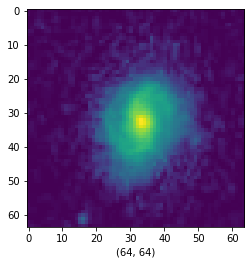

Auto Encoder


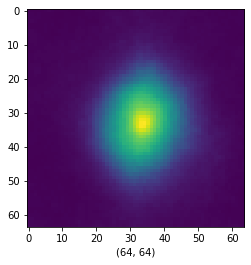

In [ ]:
prediction_img = 12
print("NORMAL")
plt.imshow(X_Test[prediction_img])
plt.xlabel(X_Test[prediction_img].shape)
plt.show()
print("Auto Encoder")
plt.xlabel(PRE_Img2[prediction_img].shape)
plt.imshow(PRE_Img2[prediction_img])

In [ ]:
val = PRE_Img.shape
print(val)
idv = 6041

(6041, 64, 64)


In [ ]:
#val = dataframe.values
#idv = val[:,0].astype(int).astype(str)
#idv

array(['560202', '560204', '560213', ..., '999958', '999964', '999967'],
      dtype='<U21')

In [ ]:
print(PRE_Img[0])
print(str(idv))

[[0.01620065 0.01674288 0.01668691 ... 0.02368001 0.02505227 0.02487495]
 [0.01538333 0.01655838 0.01580108 ... 0.02498209 0.0261673  0.02529658]
 [0.01605297 0.01725558 0.01545796 ... 0.02855981 0.02675741 0.02318278]
 ...
 [0.01987174 0.01790156 0.01862836 ... 0.01779631 0.01845012 0.01750054]
 [0.01941403 0.01781826 0.01883486 ... 0.01861674 0.01853836 0.01929312]
 [0.01871109 0.0180945  0.01959693 ... 0.01997783 0.0186943  0.0183832 ]]
6041


In [ ]:
for i in range(6041):
  PRE_Img = AutoEncoder.predict(X_Test[:i])
  plt.savefig('/content/drive/MyDrive/Classroom/autoencoder/1/'+i+'.jpg', PRE_Img)
  #cv2.imwrite('/content/drive/MyDrive/Classroom/autoencoder/'+i+'.jpg', PRE_Img[i])

NORMAL


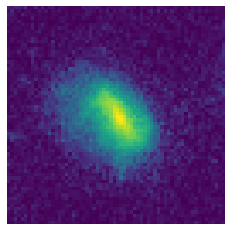

Auto Encoder


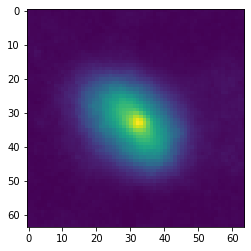

In [ ]:
prediction_img = 2
print("NORMAL")
plt.imshow(X_Test[prediction_img])
plt.axis('off')
plt.show()
print("Auto Encoder")
plt.imshow(PRE_Img2[prediction_img])

In [ ]:
for i in range(6000):
  plt.axis('off') 
  plt.imshow(X_Test[i])
  plt.savefig('/content/drive/MyDrive/Classroom/AutoEncoder/1/'+str(i)+'.jpg')

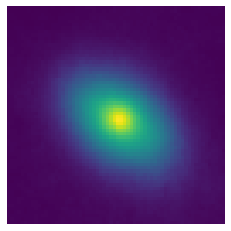

In [ ]:
for i in range(2095):
  plt.axis('off') 
  plt.imshow(PRE_Img[i])
  plt.savefig('/content/drive/MyDrive/Classroom/AutoEncoder/full_part3/'+str(i)+'.jpg')

In [ ]:
#cmap="Greys_r"

for i in range(2095):
  plt.axis('off') 
  plt.imshow(X_Test[i])
  plt.savefig('/content/drive/MyDrive/Classroom/AutoEncoder/gray2/'+str(i)+'.jpg')

------------

In [ ]:
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = Image.open('/content/drive/MyDrive/Classroom/AutoEncoder/1/1.jpg')
img.show()

In [ ]:
def crop_center(pil_img, crop_width: int, crop_height: int) -> Image:
    """
    Функция для обрезки изображения по центру.
    """
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))
 
for i in range(1251): 
  im = Image.open('/content/drive/MyDrive/Classroom/AutoEncoder/gray/'+str(i)+'.jpg')
  im_new = crop_center(im, 200, 200)
  im_new.save('/content/drive/MyDrive/Classroom/AutoEncoder/gray_ob/'+str(i)+'.jpg', quality=95)

In [ ]:
from PIL import Image

def crop_center(pil_img, crop_width: int, crop_height: int) -> Image:
    """
    Функция для обрезки изображения по центру.
    """
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))
 
#for i in range(2095): 
im = Image.open('/568773.jpg')
im_new = crop_center(im, 200, 200)
im_new.save('/568773+1.jpg', quality=95)